In [1]:
# Librerías a usar
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Tenemos una tabla de clientes con 3 filas (una por cliente) y 3 columnas
# x1: tarjeta crédito (0:no, 1:sí)
# x2: póliza crédito (0:no, 1:sí)
# y: contrató crédito personal cuando se lo ofreció  (0:no, 1:sí)
XY_train = {"x1":[0,0,1,1],
         "x2":[0,1,0,1],
         "y": [0,1,1,0]}
XY_train = pd.DataFrame(XY_train)
XY_train

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [3]:
# Se define las variables independientes
X_train = XY_train.loc[:, ["x1","x2"]]

# Se define la variable dependiente
Y_train = XY_train.loc[:, ["y"]].values

In [4]:
# Se configura un Perceptrón de 3 capas
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),              # Capa de entrada
    tf.keras.layers.Dense(2, activation='sigmoid'), # Capa oculta con sigmoid
    tf.keras.layers.Dense(1, activation='sigmoid')  # Capa de salida con sigmoid
])


# Se compila el modelo
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

# Se entrena el modelo
historial = model.fit(x=X_train, y=Y_train, epochs=8000, verbose=False)

# Se visualiza el modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


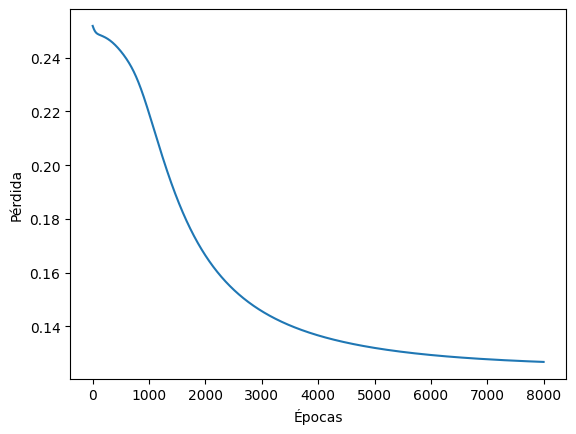

In [5]:
# Se visualiza la evolución de la función de pérdida (loss)
plt.xlabel('Épocas')
plt.ylabel("Pérdida")
plt.plot(historial.history["loss"])
plt.show()

In [6]:
# Se muestra la precisión final sobre el conjunto de entrenamiento
accuracy = historial.history['accuracy']
print("Precisión final del modelo:", accuracy[-1])

Precisión final del modelo: 0.5


In [7]:
# Visualizar los pesos de la capa oculta
weights_hidden = model.layers[0].get_weights()[0]  # Pesos de la capa oculta
biases_hidden = model.layers[0].get_weights()[1]  # Sesgos de la capa oculta
weights_hidden=np.insert(weights_hidden, 0, biases_hidden)
print("Pesos del perceptrón capa oculta:", weights_hidden)

# Visualizar los pesos de la capa de salida
weights_output = model.layers[1].get_weights()[0]  # Pesos de la capa de salida
biases_output = model.layers[1].get_weights()[1]  # Sesgos de la capa de salida
weights_output=np.insert(weights_output, 0, biases_output)
print("Pesos del perceptrón capa salida:", weights_output)

Pesos del perceptrón capa oculta: [ 0.49705902 -3.9227862  -4.323313    4.6802526  -6.776221   -7.0550385 ]
Pesos del perceptrón capa salida: [ 9.1222569e-04 -5.5666265e+00  5.0810008e+00]
